In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:

# Load the dataset
df = pd.read_csv('../../data/Gold Price (2013-2023).csv')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%
...,...,...,...,...,...,...,...
2578,01/08/2013,"1,663.20","1,651.50","1,662.60","1,648.80",0.13K,0.97%
2579,01/07/2013,"1,647.20","1,657.30","1,663.80","1,645.30",0.09K,-0.16%
2580,01/04/2013,"1,649.90","1,664.40","1,664.40","1,630.00",0.31K,-1.53%
2581,01/03/2013,"1,675.60","1,688.00","1,689.30","1,664.30",0.19K,-0.85%


In [0]:

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
for col in ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']:
    df[col] = df[col].str.replace(',', '')  # Remove commas
    df[col] = df[col].astype(str)  # Ensure all columns are string
    if col == 'Vol.':
        df[col] = df[col].str.replace('K', '').astype(float) * 1000  # Remove 'K' and multiply by 1000
    elif col == 'Change %':
        df[col] = df[col].str.replace('%', '').astype(float) / 100  # Remove percentage signs and convert to float
    else:
        df[col] = df[col].astype(float)  # Convert to float

print(df)

            Date   Price    Open     High      Low      Vol.  Change %
0     12/30/2022  1826.2  1821.8  1832.40  1819.80  107500.0    0.0001
1     12/29/2022  1826.0  1812.3  1827.30  1811.20  105990.0    0.0056
2     12/28/2022  1815.8  1822.4  1822.80  1804.20  118080.0   -0.0040
3     12/27/2022  1823.1  1808.2  1841.90  1808.00  159620.0    0.0074
4     12/26/2022  1809.7  1805.8  1811.95  1805.55       NaN    0.0030
...          ...     ...     ...      ...      ...       ...       ...
2578  01/08/2013  1663.2  1651.5  1662.60  1648.80     130.0    0.0097
2579  01/07/2013  1647.2  1657.3  1663.80  1645.30      90.0   -0.0016
2580  01/04/2013  1649.9  1664.4  1664.40  1630.00     310.0   -0.0153
2581  01/03/2013  1675.6  1688.0  1689.30  1664.30     190.0   -0.0085
2582  01/02/2013  1689.9  1675.8  1695.00  1672.10      60.0    0.0078

[2583 rows x 7 columns]


In [5]:

# Use only the 'Price' column for clustering (you can add more features)
X = df[['Price']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

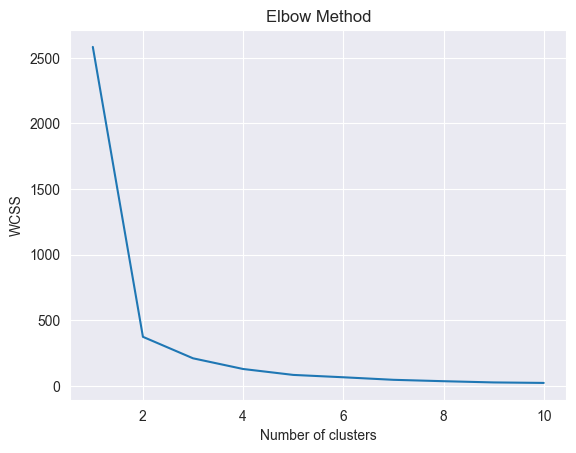

In [6]:

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [ ]:

# Fit K-means with the optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

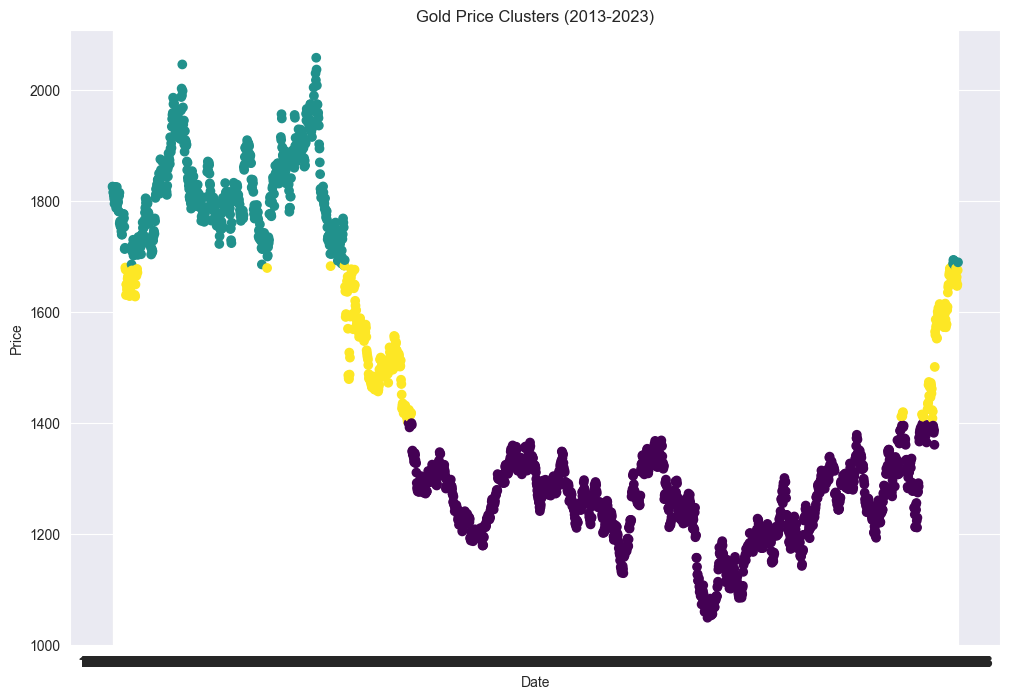

In [8]:

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(12, 8))
plt.scatter(
    df['Price'],
    df['Date'],
    c=df['Cluster'],
    cmap='viridis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Price Clusters (2013-2023)')
plt.show()
